# STOCK PRICE PREDICTION 

In [16]:
import sys
!{sys.executable} -m pip install yfinance --upgrade --quiet

In [17]:
import yfinance as yf
print("yfinance is installed and ready!")


yfinance is installed and ready!


### Importing Required Libraries We import all the necessary libraries for data analysis, visualization, and building prediction models using Linear Regression and SVR.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

### Downloading Stock Data  
We download historical stock price data for Oracle (ORCL) from Yahoo Finance and reset the index to include the date as a separate column.


In [19]:
ticker = "ORCL"  # change to any stock symbol
df = yf.download(ticker, start="2022-07-20", end="2025-10-06")
df.reset_index(inplace=True)  # move 'Date' from index to column
df.tail()

C:\Users\HP\AppData\Local\Temp\ipykernel_20140\677810497.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2022-07-20", end="2025-10-06")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,ORCL,ORCL,ORCL,ORCL,ORCL
801,2025-09-29,282.760010,285.980011,279.609985,284.600006,25778500
802,2025-09-30,281.239990,284.000000,275.899994,283.690002,23880800
803,2025-10-01,289.010010,289.989990,277.880005,278.799988,23378300
804,2025-10-02,288.779999,294.970001,286.049988,291.799988,16215500
805,2025-10-03,286.140015,294.640015,284.000000,289.600006,13688400


### Data Cleaning and Normalization  
We remove missing and duplicate records, then normalize the closing prices to bring all values within a 0–1 range for easier comparison.


In [20]:
df = df.dropna()              # remove missing values
df = df.drop_duplicates()     # remove duplicates
df['Normalized_Close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())
print("Data prepared successfully!")
df.head()

Data prepared successfully!


Price,Date,Close,High,Low,Open,Volume,Normalized_Close
Ticker,,ORCL,ORCL,ORCL,ORCL,ORCL,
0,2022-07-20,69.707237,70.196986,69.294321,69.668832,5655700,0.041020
1,2022-07-21,71.579803,71.666226,69.265508,69.284718,7005100,0.047964
2,2022-07-22,71.925514,72.300026,71.310931,71.848689,6659800,0.049245
3,2022-07-25,71.887108,72.434471,71.387754,72.117575,5721600,0.049103
4,2022-07-26,71.090057,72.309626,70.782766,71.829483,7284400,0.046148


### Descriptive Statistics  
We display key statistical measures like mean, median, and standard deviation to understand the overall distribution of stock closing prices.


In [21]:
print("Descriptive Statistics for Close Price:")
print(df['Close'].describe())
print("\nMean Closing Price:", df['Close'].mean())
print("Median Closing Price:", df['Close'].median())
print("Standard Deviation:", df['Close'].std())

Descriptive Statistics for Close Price:
Ticker        ORCL
count   806.000000
mean    130.942025
std      51.268165
min      58.644741
25%      94.210773
50%     115.146515
75%     160.568314
max     328.329987

Mean Closing Price: Ticker
ORCL    130.942025
dtype: float64
Median Closing Price: Ticker
ORCL    115.146515
dtype: float64
Standard Deviation: Ticker
ORCL    51.268165
dtype: float64


### Stock Price Trend Visualization  
We plot the historical closing prices to observe overall stock trends and fluctuations over time.


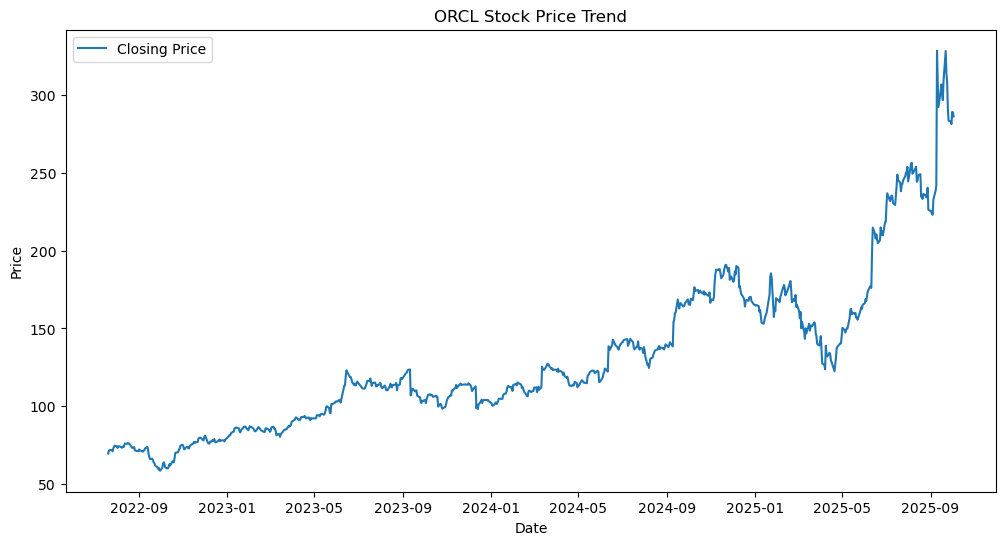

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Closing Price")
plt.title(f"{ticker} Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Daily Returns Distribution  
We calculate and plot daily returns to visualize how frequently price changes occur and measure stock volatility.


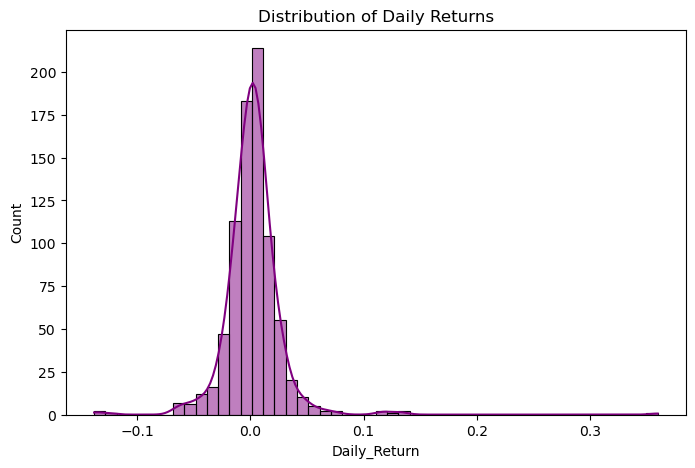

In [23]:
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color="purple")
plt.title("Distribution of Daily Returns")
plt.show()

Box plot of daily returns to identify outliers.  
- The box shows the **interquartile range (IQR)**.  
- The line inside the box is the **median**.  
- Whiskers extend to 1.5×IQR.  
- Points beyond whiskers are **outliers**.


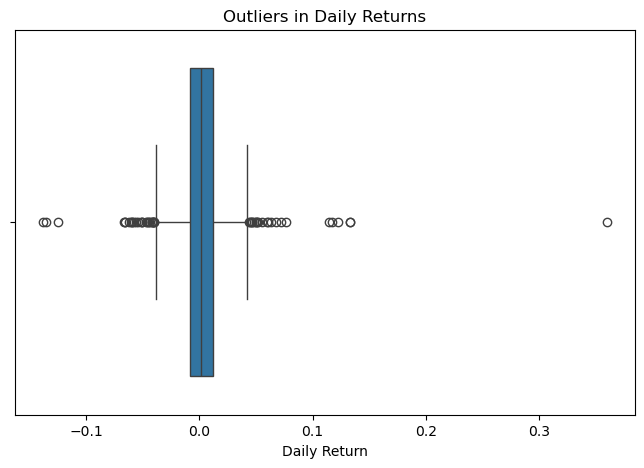

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Daily_Return'])
plt.title("Outliers in Daily Returns")
plt.xlabel("Daily Return")   # x-axis label
plt.show()

**Normality Test for Daily Returns**  
- Uses `stats.normaltest` to check if daily returns follow a **normal distribution**.  
- `p-value < 0.05` → **Reject null hypothesis** → Data does **not** follow normal distribution.  
- `p-value ≥ 0.05` → Fail to reject null hypothesis → Data **follows** normal distribution.


In [25]:
k2, p = stats.normaltest(df['Daily_Return'].dropna())
print("P-value for normality test:", p)
if p < 0.05:
    print("Daily returns do NOT follow normal distribution")
else:
    print("Daily returns follow normal distribution")

P-value for normality test: 2.117468354950166e-153
Daily returns do NOT follow normal distribution


### **Linear Regression Prediction of Stock Prices**  
- Converts dates to numeric values for regression (`Date_num`).  
- Fits a **linear regression model** to predict closing prices.  
- Predicts stock prices for the **next 5 days**.  
- Plots actual prices (blue) and regression line (red) to visualize the trend.


Next 5 days predicted prices for ORCL:
[[209.72762026]
 [209.92239306]
 [210.11716585]
 [210.31193865]
 [210.50671144]]


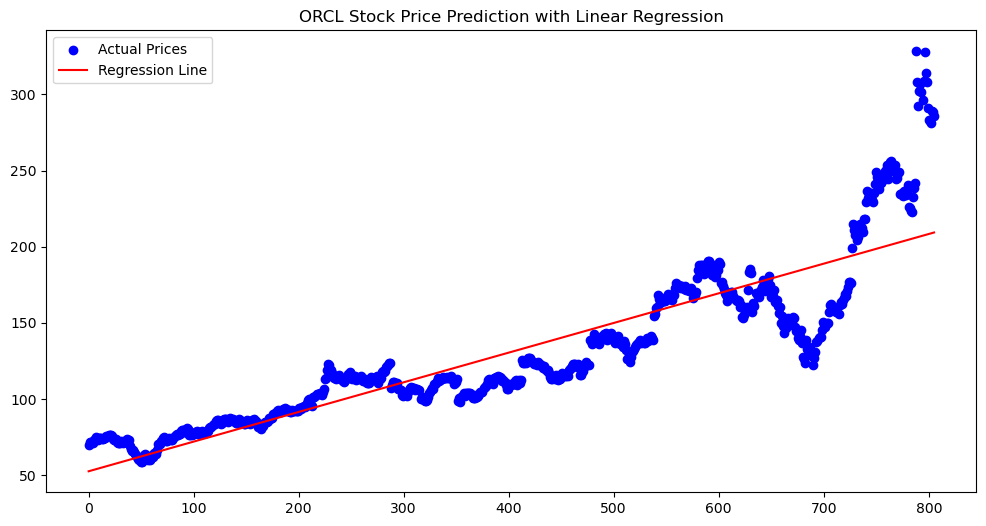

In [26]:
df['Date_num'] = np.arange(len(df))
X = df[['Date_num']]
y = df['Close']

model = LinearRegression()
model.fit(X, y)

# Predict next 5 days
future_days = [[len(df)+i] for i in range(1,6)]
predicted_prices = model.predict(future_days)
print(f"Next 5 days predicted prices for {ticker}:")
print(predicted_prices)

# Plot Regression Line
plt.figure(figsize=(12,6))
plt.scatter(X, y, label="Actual Prices", color="blue")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.title(f"{ticker} Stock Price Prediction with Linear Regression")
plt.legend()
plt.show()

### **SVR (Support Vector Regression) Prediction of Stock Prices**  
- Scales features and target using `StandardScaler` for better SVR performance.  
- Fits an **RBF kernel SVR** model to predict closing prices.  
- Predicts stock prices for the **next 5 days**.  
- Plots actual prices (blue) and SVR predictions (red) to visualize the fit.


Next 5 days predicted prices using SVR for ORCL:
[285.95730472 287.17656024 288.39459799 289.61122673 290.8262552 ]


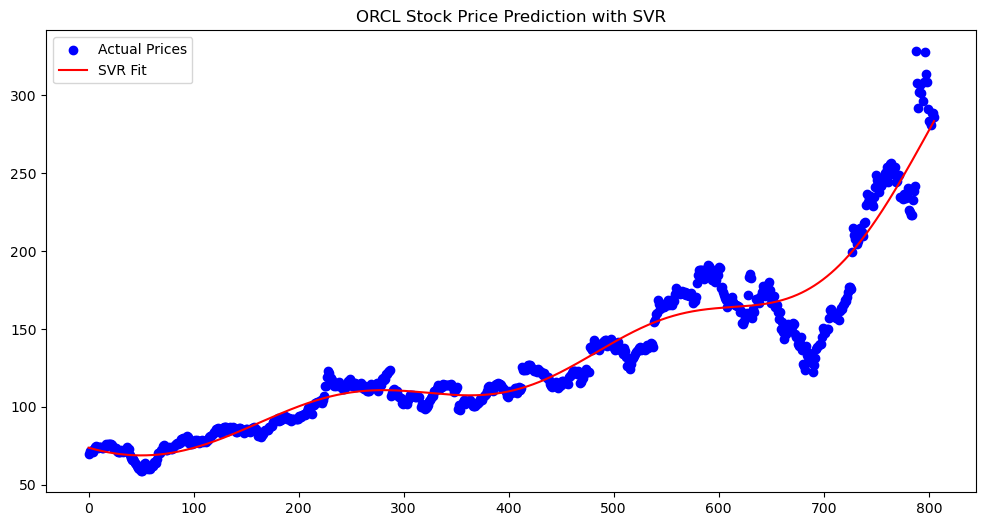

In [27]:
# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Train SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_scaled, y_scaled)

# Predict next 5 days
future_scaled = scaler_X.transform(np.array([[len(df)+i] for i in range(1,6)]))
pred_scaled = svr_model.predict(future_scaled)
pred_prices_svr = scaler_y.inverse_transform(pred_scaled.reshape(-1,1)).ravel()

print(f"\nNext 5 days predicted prices using SVR for {ticker}:")
print(pred_prices_svr)

# Plot
plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, scaler_y.inverse_transform(svr_model.predict(X_scaled).reshape(-1,1)), color='red', label='SVR Fit')
plt.title(f"{ticker} Stock Price Prediction with SVR")
plt.legend()
plt.show()


### **Realistic Simulation of Next 5 Days Stock Prices**  
- Uses historical **daily returns** to simulate future prices.  
- Each day’s price is calculated by randomly applying a past daily return to the previous price.  
- Provides a **stochastic/realistic projection** rather than a fixed trend.  
- Plots historical prices (blue) and simulated future prices (red, dashed) for visualization.



Next 5 days predicted prices (Realistic Simulation):
[Ticker
ORCL    299.234633
Name: 805, dtype: float64, Ticker
ORCL    298.996484
Name: 805, dtype: float64, Ticker
ORCL    297.829952
Name: 805, dtype: float64, Ticker
ORCL    280.208459
Name: 805, dtype: float64, Ticker
ORCL    286.92566
Name: 805, dtype: float64]


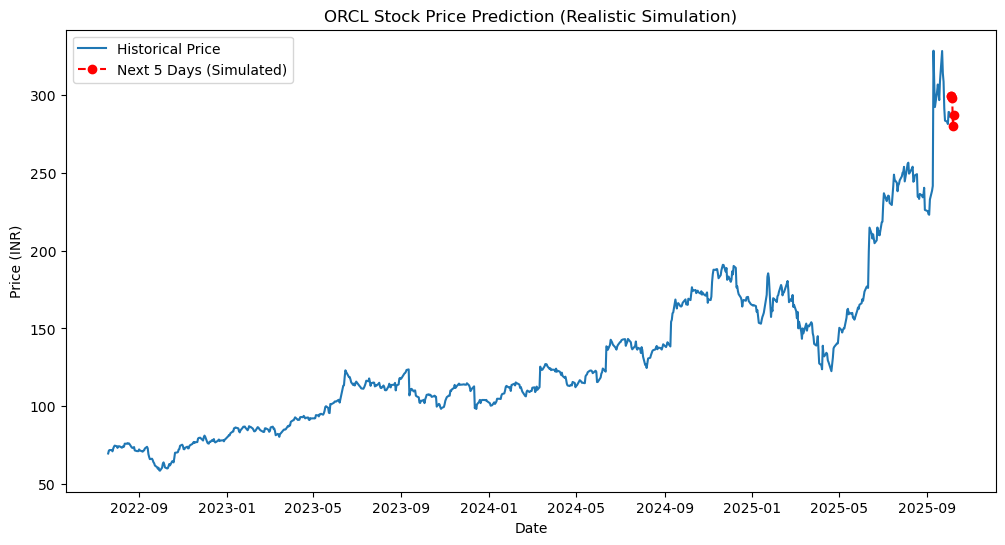

In [28]:
daily_returns = df['Daily_Return'].dropna()
last_price = df['Close'].iloc[-1]

predicted_prices_realistic = [last_price]
for i in range(5):
    change = np.random.choice(daily_returns)
    new_price = predicted_prices_realistic[-1] * (1 + change)
    predicted_prices_realistic.append(new_price)

predicted_prices_realistic = predicted_prices_realistic[1:]  # remove current price
print(f"\nNext 5 days predicted prices (Realistic Simulation):")
print(predicted_prices_realistic)

# Plot realistic simulation
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(1, unit='d'), periods=5)
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Historical Price")
plt.plot(future_dates, predicted_prices_realistic, marker='o', linestyle='--', color='red', label="Next 5 Days (Simulated)")
plt.title(f"{ticker} Stock Price Prediction (Realistic Simulation)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

### **Comparison of Two Stocks (Normalized Closing Prices)**  
- Downloads historical data for two stocks (`ITC.NS` and `RELIANCE.NS`).  
- Normalizes closing prices to a **0–1 range** for direct comparison.  
- Plots both stocks over time to visualize **relative performance trends**.


C:\Users\HP\AppData\Local\Temp\ipykernel_20140\1102012949.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download(ticker1, start="2020-01-01", end="2025-09-20")
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_20140\1102012949.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download(ticker2, start="2020-01-01", end="2025-09-20")
[*********************100%***********************]  1 of 1 completed


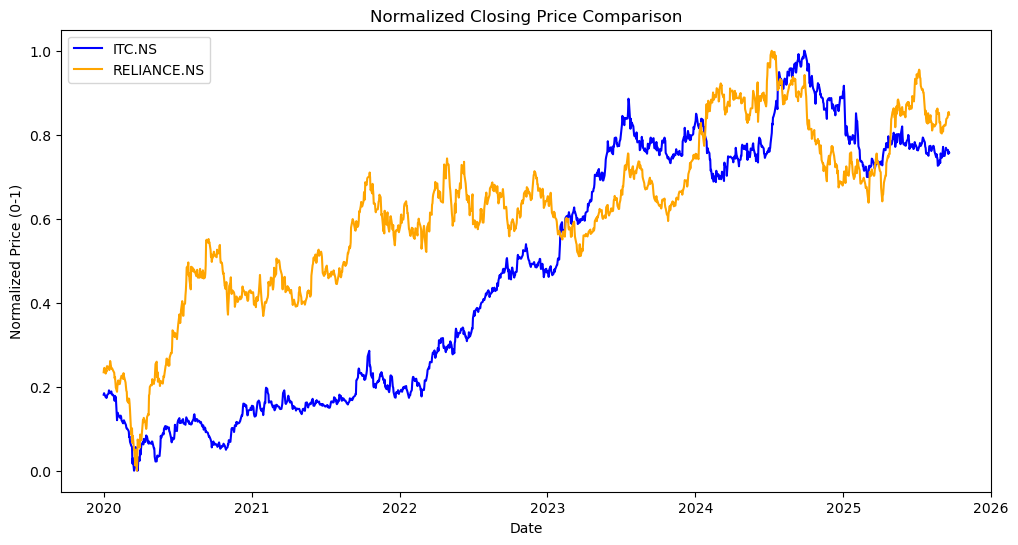

In [29]:
# Choose two stocks
ticker1 = "ITC.NS"
ticker2 = "RELIANCE.NS"
# Download historical data
df1 = yf.download(ticker1, start="2020-01-01", end="2025-09-20")
df2 = yf.download(ticker2, start="2020-01-01", end="2025-09-20")
# Normalize closing prices
norm1 = (df1['Close'] - df1['Close'].min()) / (df1['Close'].max() - df1['Close'].min())
norm2 = (df2['Close'] - df2['Close'].min()) / (df2['Close'].max() - df2['Close'].min())

# Plot
plt.figure(figsize=(12,6))
plt.plot(df1.index, norm1, label=ticker1, color='blue')
plt.plot(df2.index, norm2, label=ticker2, color='orange')
plt.title("Normalized Closing Price Comparison")
plt.xlabel("Date")
plt.ylabel("Normalized Price (0-1)")
plt.legend()
plt.show()

### Evaluating and Comparing the Predictive Models

The performance of the trained models is evaluated on the test data using two key metrics: R-squared ($R^2$) and Mean Absolute Error (MAE).

#### 1) Linear Regression Model

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 40.1454
Mean Squared Error (MSE): 2158.2006
Root Mean Squared Error (RMSE): 46.4564
R-squared (R²): 0.2568


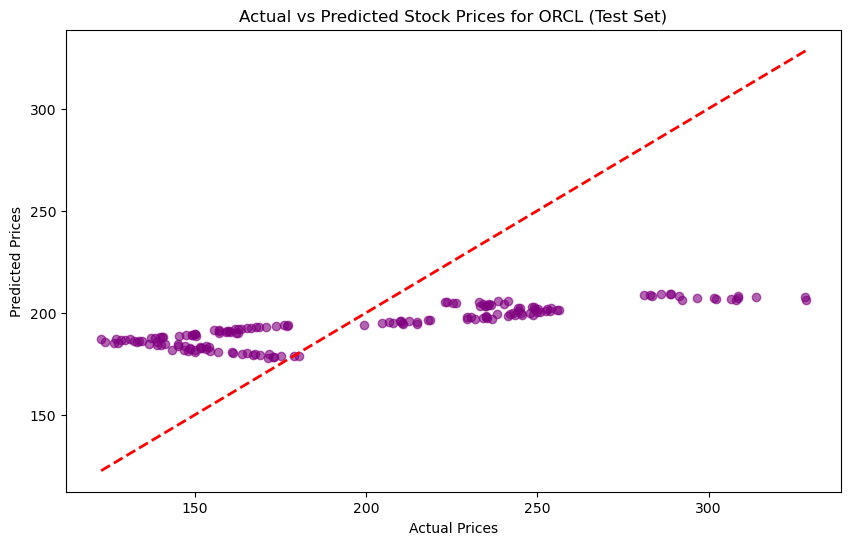

In [31]:
# --- Separate Evaluation Block ---

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Use the already trained model to predict on test set
y_pred_test = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_test, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Stock Prices for {ticker} (Test Set)')
plt.show()


#### 2)Support Vector Regression

SVR Model Evaluation on Test Set:
Mean Absolute Error (MAE): 22.4418
Mean Squared Error (MSE): 685.6999
Root Mean Squared Error (RMSE): 26.1859
R-squared (R²): 0.7639


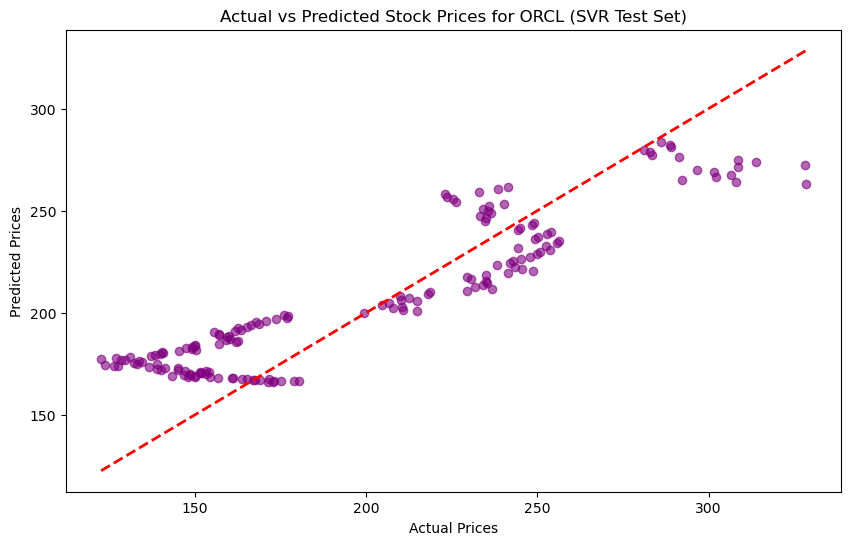

In [32]:
# --- Separate Evaluation Block for SVR ---

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# --- Create train-test split for evaluation ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- Scale features using the same scalers ---
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

# --- Predict on test set using SVR ---
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred_test = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

# --- Calculate performance metrics ---
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("SVR Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# --- Plot Actual vs Predicted Prices ---
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_test, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Stock Prices for {ticker} (SVR Test Set)')
plt.show()


### Model Comparison

In [33]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# --- Calculate metrics for Linear Regression (assuming model is trained) ---
y_pred_lr = model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# --- Calculate metrics for SVR ---
y_pred_svr_scaled = svr_model.predict(scaler_X.transform(X_test))
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1,1)).ravel()
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# --- Create a comparison DataFrame ---
comparison_data = {
    'Model': ['Linear Regression', 'SVR'],
    'R-squared (R²)': [r2_lr, r2_svr],
    'Mean Absolute Error (MAE)': [mae_lr, mae_svr]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index('Model', inplace=True)

# --- Display comparison ---
print("--- Performance Comparison of All Models ---")
print(comparison_df)

print("\n--- Conclusion ---")
print(f"The model with the highest R-squared score is '{comparison_df['R-squared (R²)'].idxmax()}'.")
print(f"The model with the lowest Mean Absolute Error is '{comparison_df['Mean Absolute Error (MAE)'].idxmin()}'.")


--- Performance Comparison of All Models ---
                   R-squared (R²)  Mean Absolute Error (MAE)
Model                                                       
Linear Regression        0.256830                  40.145445
SVR                      0.763881                  22.441822

--- Conclusion ---
The model with the highest R-squared score is 'SVR'.
The model with the lowest Mean Absolute Error is 'SVR'.
